In [1]:
import warnings
warnings.filterwarnings("ignore")
import torch

**1.PyTorch vs Numpy**

Deosebiri fundamentale intre PyTorch si Numpy:
1. Numpy:
- poate lucra cu date multidimensionale acestea fiind stocate in array
- este utilizata pentru calcul stiintific/operatii matematice (manipularea datelor)
- nu poate efectua calcule de gradient (nu ofera un sistem de autograd)
- nu ofera suport pentru operatii implicate in invatarea automata
- array-urile pot fi convertite in tensori si viceversa
- nu ofera suport direct pentru calculul pe GPU

2. Pytorch:
- poate lucra cu date multidimensionale acestea fiind stocate in tensori
- este folosit pentru dezvoltarea si antrenarea modelelor din Deep Learning
- are un sistem autograd incorporat care permite calcularea gradientului in cadrul operatiilor pe tensori
- tensorii pot fi convertiti in array-uri si viceversa
- are suport de calcul pe GPU, ceea ce face posibila accelerarea operatilor matematice cu tensori

 GPU (Unitatea de Procesare Grafica)------------------- CPU (Unitatea de Procesare Centrala)
 - CPU este mai versatil și puternic pentru sarcini variate, în timp ce GPU este specializată în calcule masive în paralel și este potrivită pentru sarcini care pot beneficia de paralelism masiv. 
 - In invatarea automata se prefera GPU.

**2.Tensori**

- Definirea tensorilor

In [2]:
#crearea unui tensor vid
empty_tensor=torch.tensor([])

#crearea unui tensor de ordin 0 (scalar)
scalar=torch.tensor([2])

#crearea unui tensor de ordin 1 (vector)
vector=torch.tensor([9,3,2,1,9,0])

#crearea unui tensor de ordi 2 (matrice)
matrice=torch.tensor([[1,2,3],
                     [9,3,1],
                     [9,8,4]])

#crearea unui tensor multi-dimensional
N_dimensional=torch.tensor([[[1,2],[3,4]],[[6,4],[0,1]]])

- Dimensiunea tensorilor

In [3]:
#dimensiunea unui tensor se determina cu nume_tensor.shape
N_dimensional.shape

torch.Size([2, 2, 2])

- Redimensionarea tensorilor

In [4]:
#se realizeaza prin nume_tensor.reshape(noile_dimensiuni)
a=torch.tensor([1,2,3,4,5,6,7,8],dtype=torch.uint8)
a=a.reshape(2,4)
print(a.shape)

torch.Size([2, 4])


- Tensorii sunt imutabili (pentru a putea face o modificare intr-un tensor trebuie creata o copie a sa)

In [5]:
b=torch.tensor([1,2,3,4,5,6],dtype=torch.uint8)

#cream o copie a tensorului b pe care o vom putea modifica
c=b.clone()
c[0]=12
print(c)

#cream o alta referinta catre tensorul initial (modificarea pe care o vom face pe unul dintre tensori se va reflecta si pentru celalalt)
b=b.reshape(3,2)
print(b)

tensor([12,  2,  3,  4,  5,  6], dtype=torch.uint8)
tensor([[1, 2],
        [3, 4],
        [5, 6]], dtype=torch.uint8)


- Tipul tensorilor pote fi specificat la crearea acestora folosind argumentul dtype

In [6]:
#tipul torch.float32
t1=torch.tensor([8,6.2,8.9],dtype=torch.float32)

#tipul torch.float64/torch.double
t2=torch.tensor([7,1,2,4,5],dtype=torch.double)

#tipul torch.int32
t3=torch.tensor([1,2,3,44],dtype=torch.int32)

#tipul torch.int64
t4=torch.tensor([9,6,3,2,1],dtype=torch.int64)

#tipul torch.uint8->valori intregi fara semn
t5=torch.tensor([9,1,2,3,4],dtype=torch.uint8)

#tipul bool
t6=torch.tensor([True,False,True],dtype=torch.bool)

- Conversia tipului tensorilor se poate face prin functia type() sau to()

In [7]:
v=torch.tensor([7,4,3,2],dtype=torch.int64)
v=v.type(torch.uint8)
print(v)

tensor([7, 4, 3, 2], dtype=torch.uint8)


- Functii utilitare (utility function)- faciliteaza lucrul cu tensori

In [8]:
#crearea unui tensor nul
a=torch.zeros(2,2,3)

#crearea unui tensor avand toate elementele 1
b=torch.ones(3,2,2)

#crearea unui tensor identitate
c=torch.eye(2,2)


- Operatii cu tensori

In [9]:
#generarea elementelor unui tensor
x1=torch.arange(1,10,0.5)

#generarea unui tensor cu valori random extrase dintr-o distributie gaussiana
x2=torch.randn(10)

#adunarea /scaderea tensorilor impune ca si conditie ca tensorii sa aiba aceasi dimensiune, se realizeaza pe componente

x3=torch.arange(1,11)
x3=x3.reshape(2,5)
x4=torch.arange(11,21)
x4=x4.reshape(2,5)
x5=x3+x4

#inmultirea element cu element 
x6=x3*x4

#inmultirea matriceala a tensorilor
x7=torch.tensor([[1,2],
                [3,4]])
x8=torch.tensor([[1],
                [3]])
x9=x7@x8

#suma tuturor elementelor unui tensor
s1=x7.sum()

#suma elementelor de pe fiecare coloana
s2=x7.sum(dim=0)

#suma elementelor de pe fiecare linie
s3=x7.sum(dim=1)

#deviatia standard a elementelor unui tensor
d=x2.std()

- Accesarea elementelor unui tensor

In [10]:
#Indexarea intr-un tensor se face pornind de la 0

#accesarea elementelor unui tensor 1D
q1=torch.randn(7)
print("Al doilea element: ",q1[1])

#accesarea elementelor unui tensor 2D
q2=torch.arange(1,5).reshape(2,2)
print("Elementul de pe pozitia (2,2): ",q2[1,1])

#accesarea unei linii a unui tensor 2D
print("Elementele primei linii: ",q2[0,:])

#accesarea unei coloane a unui tensor 2D
print("Elementele primei coloane: ",q2[:,0])

#accesarea elementelor unui tensor N dimensional
q3=torch.tensor([[[1,2],
                 [3,4]],
                 [[0,1],
                 [1,1]]])
print("Elementul primului neuron,aflat pe linia 1, coloana 2: ",q3[0,0,1])

Al doilea element:  tensor(0.7064)
Elementul de pe pozitia (2,2):  tensor(4)
Elementele primei linii:  tensor([1, 2])
Elementele primei coloane:  tensor([1, 3])
Elementul primului neuron,aflat pe linia 1, coloana 2:  tensor(2)


**3.Autograd**

Autograd (diferentierea automata) este un mecanism folosit de Pytorch pentru a calcula gradientul automat pentru un anumit tensor.

In [11]:
#La crearea unui tensor se poate specifica daca dorim sa fie inregistrat automat gradientul acestuia 
#prin starea requires_grad=True. Gradientii pentru tensorul specificat se vor acumula.
x=torch.tensor([2.0],requires_grad=True)
f=x**2

#calcul gradientului prin specificarea functiei la care ne raportam pentru a calcula gradientul
f.backward()

#obtinerea gradientului functiei calculat in tensorul ce contine requires_grad=True prin atributul grad
gradient=x.grad

gradient

tensor([4.])

In [12]:
#valoarea gradientului calculat pentru un tensor raportat la mai multe functii se acumuleaza

g=x**3
g.backward()
gradient1=x.grad
gradient1

tensor([16.])

In [13]:
#oprirea temporara a inregistrarii gradientilor se face cu torch.no_grad()

d=torch.tensor([3.0],requires_grad=True)
h=2*d
h.backward()
gradient_calculat=d.grad
with torch.no_grad():
    val=d**2
    print("Valoarea lui 'val' calculata fara gradient: ",val)

Valoarea lui 'val' calculata fara gradient:  tensor([9.])


**4.NEURAL NETWORK MODULE**

'torch.nn' este un modul fundamental al framework-ului PyTorch ce contine o serie de clase ce reprezinta straturile retelei neuronale. Cu ajutorul acestor clase putem defini structura retelelor neuronale. Acest modul prin clasele sale ne permite:
- configurarea parametrilor ce intevin in arhitectura retelei
- functii de activare 
- Functii de cost, care sa masoare eroarea
- efectuarea de operatii cu tensori
- initializarea automata a parametrilor din cadrul retei

Modulul 'torch.nn' fucntioneaza in stransa legatura cu 'torch.optim' ce ofera algoritmi de optimizare prin care ponderile sunt update.

**a) Crearea unui strat liniar (Linear Layer)**

In [14]:
import torch.nn as nn

x=torch.ones(2,3,4)#ne-am definit un tensor unde 2-reprezinta dimensiunea batch-ului, fiecare element din batch va fi in cazul
                   #nostru o matrice avand 3 lini si 4 coloane
print("Tensorul care va fi introdus in retea: ")
print(x)

#vom crea un strat liniar
linear_layer=nn.Linear(4,2)#se genereaza ponderile si bias-ul in mod random, linear_layer fiind un obiect creat la clasa 'Linear'

#Calculele care se efectueaza au urmatoarea regula:
#- tensorul x contine in cazul de fata 2 matrici(neuroni) de dimensiune (3,4) fiecare
#- nn.Linear(4,2) va geenera o matrice de ponderi de dimensiune(2,4)
#- este important ca numarul de coloane ale matricilor de ponderi sa coincida cu numarul de coloane ale neuronilor
#- de asemenea se genereaza si un bias care este un vector de dimensiune (1,2)
#- calculul care se efectueaza pentru primul neuron:
#    [[x[0]*w[0]+b[0],x[0]*w[1]+b[1]],
#     [x[1]*w[0]+b[0],x[1]*w[1]+b[1]],
#     [x[2]*w[0]+b[0],x[2]*w[1]+b[1]]]
#- un calcul similar se face pentru cel de-al doilea neuron
#- matricea de ponderi generata si bias-ul sunt identice pentru ambii neuroni
#- asadar dupa transformarea liniara rezulta un tensor avand doua caracteristici (neuroni) de dimensiune (3,2)

#Putem vizualiza ponderile si bias-ul care au fost generate automat
print("Parametrii stratului liniar:")
print("Ponderi (weights):", linear_layer.weight)
print("Bias:", linear_layer.bias)

Tensorul care va fi introdus in retea: 
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
Parametrii stratului liniar:
Ponderi (weights): Parameter containing:
tensor([[ 0.0815, -0.0560,  0.1442,  0.1023],
        [-0.4752, -0.2734, -0.3016,  0.0393]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.0752, -0.2064], requires_grad=True)


In [15]:
#Aplicam stratul liniar asupra tensorului x
print("Output-ul obtinut in urma aplicarii startului liniar asupra tensorului x este: ")
linear_output=linear_layer(x)
print(linear_output)

Output-ul obtinut in urma aplicarii startului liniar asupra tensorului x este: 
tensor([[[ 0.1968, -1.2173],
         [ 0.1968, -1.2173],
         [ 0.1968, -1.2173]],

        [[ 0.1968, -1.2173],
         [ 0.1968, -1.2173],
         [ 0.1968, -1.2173]]], grad_fn=<ViewBackward0>)


**b) Aplicarea unei functii de activare (Activation Function Layer)**

Functia de activare are rolul in principiu de a adauga neliniarite in reteaua creata. Acesta se aplica fiecarui element din tensor fara a schimba dimensiunea acestuia.

In [16]:
sigmoid = nn.Sigmoid()#cream un obiect la clasa Sigmoid
output = sigmoid(linear_output)#aplicam functia sigmoid fiecarui element din tensorul linear_output
print("Tensorul rezultat in urma aplicarii functiei sigmoid este: ")
print(output)

Tensorul rezultat in urma aplicarii functiei sigmoid este: 
tensor([[[0.5490, 0.2284],
         [0.5490, 0.2284],
         [0.5490, 0.2284]],

        [[0.5490, 0.2284],
         [0.5490, 0.2284],
         [0.5490, 0.2284]]], grad_fn=<SigmoidBackward0>)


Alte functii de activare care se pot aplica sunt: ReLU(), Tanh(), Softmax(), LeakyReLU().

**c) Constructia eficienta, secventiala a retelelor neuronale**

Pentru a crea o retea neuronala intr-un mod eficient putem folosi clasa 'Sequentual'. Aceasta ne permite definirea unei serii de straturi in mod secvential. Straturile vor fi adaugate in ordinea in care ar trebui sa fie aplicate.

In [17]:
#ne definim un tensor cu doua caracteristici
x = torch.ones(2,3,4)

#ne definim urmatoarea secventa 
block = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid()
)
#trecem tensorul x prin straturile definite in interiorul blocului
output = block(x)

print("Output-ul obtinut: ")
output

Output-ul obtinut: 


tensor([[[0.5892, 0.2741],
         [0.5892, 0.2741],
         [0.5892, 0.2741]],

        [[0.5892, 0.2741],
         [0.5892, 0.2741],
         [0.5892, 0.2741]]], grad_fn=<SigmoidBackward0>)

**d) Module Personalizate (Custom Modules)**

'nn.Module' este o clasa din PyTorch care ne permite definirea, gestionarea si organizarea modulelor unei retele neuronale prin extinderea acestei clase. In accest fel clasa parinte se va ocupa de gestionarea parametrilor si de aspecte ce priveste definirea si utilizarea modelelor in retelele neuronale, iar child class poate fi folosita pentru a defini straturi (layers) si operatii.

In [18]:
#Cream clasa MultilayerPerceptron care mostenste clasa nn.Module

class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(MultilayerPerceptron, self).__init__()
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        #ne definim o secventa de straturi data de urmatorul bloc
        self.model = nn.Sequential(
            #ne definim un strat liniar (se genereaza ponderile si bias-ul in mod random)
            #nn.Linear(self.input_size, self.hidden_size) va geenera o matrice de ponderi de dimensiune(hidden_size,input_size)
            #se genereaza si un bias care este un vector de dimensiune (1,hidden_size)
             nn.Linear(self.input_size, self.hidden_size),
            #aplicam functia de activare ReLU()
             nn.ReLU(),
            ##ne definim un nou strat liniar
             nn.Linear(self.hidden_size, self.input_size),
             #aplicam functia de activare Sigmoid()
             nn.Sigmoid()
            )
    #functia forword() va avea ca si argument un tensor x pe care il va trece prin retea
    def forward(self, x):
        output = self.model(x)
        return output
    
#Cream un tensor cu valori random extrase dintr-o distributie normala
t = torch.randn(2, 5)#ne-am definit un tensor unde 2-reprezinta dimensiunea batch-ului, fiecare element din batch va fi in cazul
                     #nostru un vector cu 5 elemente (dimensiunea (1,5))
    
# Cream un obiect pentru clasa MultilayerPerceptron
model = MultilayerPerceptron(5, 3)

# Trecm tensorul 't' creat prin model
output=model(t)

#Afisam o lista cu ponderile si bias-ul care au fost generate in cadrul fiecarui strat liniar
list(model.named_parameters())


[('model.0.weight',
  Parameter containing:
  tensor([[ 0.0791, -0.1316, -0.2891, -0.0724, -0.1961],
          [ 0.3692,  0.3480,  0.3911,  0.0851,  0.0703],
          [ 0.1803,  0.2802,  0.3701, -0.4099,  0.0136]], requires_grad=True)),
 ('model.0.bias',
  Parameter containing:
  tensor([-0.1730,  0.3749, -0.0842], requires_grad=True)),
 ('model.2.weight',
  Parameter containing:
  tensor([[-0.1287, -0.3904, -0.0603],
          [-0.4869, -0.1280, -0.3106],
          [ 0.4135, -0.4311,  0.5650],
          [ 0.3378, -0.1910,  0.2820],
          [ 0.5524,  0.0344, -0.3117]], requires_grad=True)),
 ('model.2.bias',
  Parameter containing:
  tensor([ 0.2874, -0.1455, -0.2087,  0.4782,  0.0837], requires_grad=True))]

**5. OPTIMIZATION**

Avand o definire clara a retelei neuronale vom fi nevoiti in continuare sa alegem o functie de cost, prin care se va evalua performanta modelului, precum si o metoda de updatare a ponderilor prin care eroarea sa se diminueze.

Epoch 0: traing loss: 0.6815793514251709
Epoch 1: traing loss: 0.5082522630691528
Epoch 2: traing loss: 0.35697484016418457
Epoch 3: traing loss: 0.2258753776550293
Epoch 4: traing loss: 0.12618672847747803
Epoch 5: traing loss: 0.06350637227296829
Epoch 6: traing loss: 0.029285527765750885
Epoch 7: traing loss: 0.012818590737879276
Epoch 8: traing loss: 0.0055492939427495
Epoch 9: traing loss: 0.0024520468432456255

Predicted values for Training Data: 
tensor([[1.0000, 0.9997, 1.0000, 1.0000, 0.9999],
        [0.9999, 0.9995, 0.9999, 1.0000, 0.9999],
        [0.9954, 0.9825, 0.9971, 0.9977, 0.9963],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.9999, 1.0000, 1.0000, 1.0000],
        [0.9990, 0.9950, 0.9990, 0.9995, 0.9987],
        [0.9991, 0.9958, 0.9996, 0.9997, 0.9995],
        [0.9989, 0.9948, 0.9996, 0.9996, 0.9995],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9999, 0.9994, 1.0000, 1.0000, 0.9999]], grad_fn=<SigmoidBackward0>)


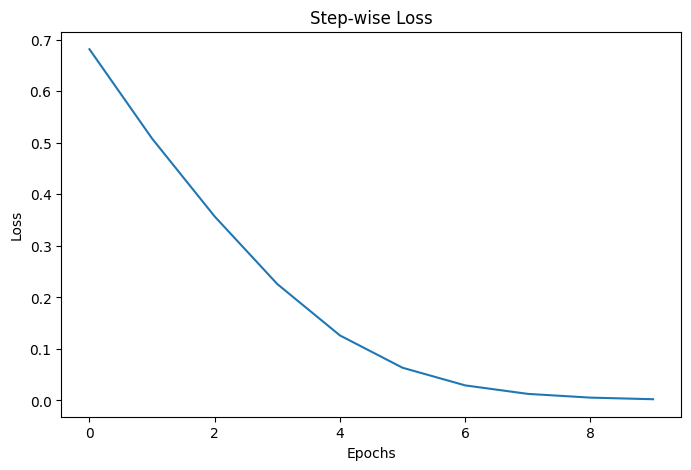


Predicted values for Test Data: 
tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.9999, 1.0000, 1.0000, 1.0000],
        [0.9994, 0.9968, 0.9991, 0.9997, 0.9990],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.9996, 0.9999, 1.0000, 0.9999],
        [1.0000, 0.9998, 1.0000, 1.0000, 1.0000],
        [0.9999, 0.9993, 0.9999, 1.0000, 0.9998],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.9997, 0.9999, 1.0000, 0.9999],
        [0.9997, 0.9983, 0.9999, 0.9999, 0.9998]], grad_fn=<SigmoidBackward0>)


In [19]:
#Importam modulul ce contine o gama larga de algoritmi de optimizare
import torch.optim as optim

#Definim output-ul la care trebuie sa ajunga inputul nostru incarcat in reteaua neuronala
y = torch.ones(10, 5)#am definit un tensor 2-D

#Generam inputul in mod artificial care va fi incarcat in retea si care va trebui sa ajunga la output-ul y
x = y + torch.randn_like(y)
#rand_like(y) genereaza un tensor de aceasi dimensiune cu y

#Cream o instanta pentru clasa 'MultilayerPerceptron'
model = MultilayerPerceptron(5, 3)

#Definim optimizatorul si configuram rata learning rate-ul
adam = optim.Adam(model.parameters(), lr=1e-1)

#Definim functia de cost
loss_function = nn.BCELoss()
#nn.BCELoss()-Binary Cross-Entropy Loss

#Antrenarea modelului:
n_epoch = 10 
loss_values=[]
for epoch in range(0,n_epoch):
  # Setam gradientul cu 0 la inceputul fiecarei iteratii dearece acestia se acumuleaza pe parcursul antrenarii modelului
    adam.zero_grad()

  # Obtinem predicted value din cadrul iteratiei
    y_pred = model(x)

  # Obtinem eroarea de aproximare
    loss = loss_function(y_pred, y)
    loss_values.append(loss.item())

  # Afisam eroarea de aproximare la fiecare iteratie
    print(f"Epoch {epoch}: traing loss: {loss}")

  # Calculam gradientul 
    loss.backward()

  # Aplica actualizarile ponedrilor modelului utilizand optimizare Adam
    adam.step()

#Afisam predictia realizata pe datele de antrenament
y_pred = model(x)
print()
print("Predicted values for Training Data: ")
print(y_pred)

#Vizualizarea evolutiei functiei de cost 
import matplotlib.pyplot as plt
import numpy as np
step = np.array(range(0,len(loss_values)))
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#Cream artificial date de testare
x2 = y + torch.randn_like(y)

#Realizam o predictie folosind reteaua neuronala pe baza datelor de testare
y_pred_test = model(x2)
print()
print("Predicted values for Test Data: ")
print(y_pred_test)


**XOR Problem**

In [26]:
class XOR(nn.Module):

    def __init__(self):
        super(XOR, self).__init__()
        self.model = nn.Sequential(
            #definim un strat liniar avand 2 neuroni
            nn.Linear(2, 3),
            #aplicam functia Sigmoid
            nn.Sigmoid(),
            #definim un hidden layer avand 3 neuroni
            nn.Linear(3, 1),
            #aplicam din nou functia Sigmoid
            nn.Sigmoid()
        )
    #functia forword(x) va avea rolul de a trece un tensor x prin model 
    def forward(self, x):
        output = self.model(x)
        return output

# Definim target variable
y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

#Definim input variable
x = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]])
#Cream o instanta pentru clasa creata
model = XOR()

#Definimo ptimizatorul pentru updatarea ponderilor
adam = optim.Adam(model.parameters(), lr=1e-1)

#Definim functia de cost
loss_function = nn.BCELoss()

#Antrenam Modelul construitt
n_epoch = 120
loss_values = []

for epoch in range(n_epoch):
    adam.zero_grad()
    y_pred = model(x)
    loss = loss_function(y_pred, y)
    loss_values.append(loss.item())
    print(f"Epoch {epoch}: training loss: {loss.item()}")
    loss.backward()
    adam.step()

y_pred = model(x)
print("\nPredicted values for Training Data:")
print(y_pred)


Epoch 0: training loss: 0.7247539162635803
Epoch 1: training loss: 0.6999012231826782
Epoch 2: training loss: 0.6931592226028442
Epoch 3: training loss: 0.6975481510162354
Epoch 4: training loss: 0.7021992802619934
Epoch 5: training loss: 0.7025330066680908
Epoch 6: training loss: 0.6998683214187622
Epoch 7: training loss: 0.6966127753257751
Epoch 8: training loss: 0.6943663358688354
Epoch 9: training loss: 0.6936389803886414
Epoch 10: training loss: 0.6941345930099487
Epoch 11: training loss: 0.6951768398284912
Epoch 12: training loss: 0.6960817575454712
Epoch 13: training loss: 0.6964159607887268
Epoch 14: training loss: 0.69609135389328
Epoch 15: training loss: 0.6952956914901733
Epoch 16: training loss: 0.6943423748016357
Epoch 17: training loss: 0.6935244798660278
Epoch 18: training loss: 0.6930183172225952
Epoch 19: training loss: 0.6928489804267883
Epoch 20: training loss: 0.6929107308387756
Epoch 21: training loss: 0.6930262446403503
Epoch 22: training loss: 0.6930198669433594


In [27]:
# Definim datele de testare 
x_test = torch.tensor([[0.0, 0.0],
                      [0.0, 1.0],
                      [1.0, 0.0],
                      [1.0, 1.0]])

# Definim target variable corespunzatoare datelor de testare
y_test = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

# Rulam modelul pe datele de testare
with torch.no_grad():  # Dezactivam urmarirea gradientilor (gradient tracking) pentru a economisii resurse
    y_pred_test = model(x_test)
print("\nPredicted values for Test Data:")
print(y_pred_test)
    


Predicted values for Test Data:
tensor([[0.0080],
        [0.9797],
        [0.9789],
        [0.0488]])
